In [2]:
# Importar las bibliotecas necesarias para el análisis y la visualización de datos

import pandas as pd  # Biblioteca utilizada para la manipulación y análisis de datos estructurados en tablas (DataFrames)

import seaborn as sns # Biblioteca para crear gráficos estadísticos y visualizaciones elegantes

import matplotlib.pyplot as plt # Biblioteca básica para la creación de gráficos en Python

# Establecer el estilo de visualización de gráficos

sns.set_style('darkgrid')  # Configura el estilo de los gráficos de Seaborn para mostrar un fondo oscuro con líneas de cuadrícula

In [3]:
# Cargar el conjunto de datos de jugadores de fútbol desde un archivo CSV
df = pd.read_csv('players_22.csv', low_memory=False)

# Seleccionar columnas específicas del DataFrame para su análisis
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]

# Seleccionar solo la primera posición del jugador en caso de que haya múltiples
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# Eliminar filas con valores NaN (datos faltantes) del DataFrame
df.dropna(inplace=True)

In [4]:
# Lista de jugadores que se perderán la Copa del Mundo debido a lesiones
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

# Identificar los índices de los jugadores en el DataFrame que están en la lista de jugadores lesionados

drop_index = df[df['short_name'].isin(players_missing_worldcup)].index # Filtra el DataFrame para obtener los índices de los jugadores que deben ser eliminados

# Eliminar del DataFrame los jugadores lesionados utilizando sus índices

df.drop(drop_index, axis=0, inplace=True)# Elimina las filas correspondientes a los jugadores lesionados del DataFrame

In [5]:
# Lista de equipos nacionales que participaron en la Copa del Mundo
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

# Filtrar el DataFrame para incluir solo los equipos nacionales que participaron en la Copa del Mundo

df = df[df['nationality_name'].isin(teams_worldcup)] # Mantiene solo las filas donde el nombre de la nacionalidad está en la lista de equipos del mundial

In [6]:
# Ordenar el DataFrame para encontrar a los mejores jugadores
# Se ordena primero por 'overall' (valor general), luego por 'potential' (potencial) y finalmente por 'value_eur' (valor en euros) 
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

# 'ascending=False' asegura que los valores más altos aparezcan primero
# 'inplace=True' modifica el DataFrame original en lugar de crear una copia

# Distribución del rendimiento de los jugadores

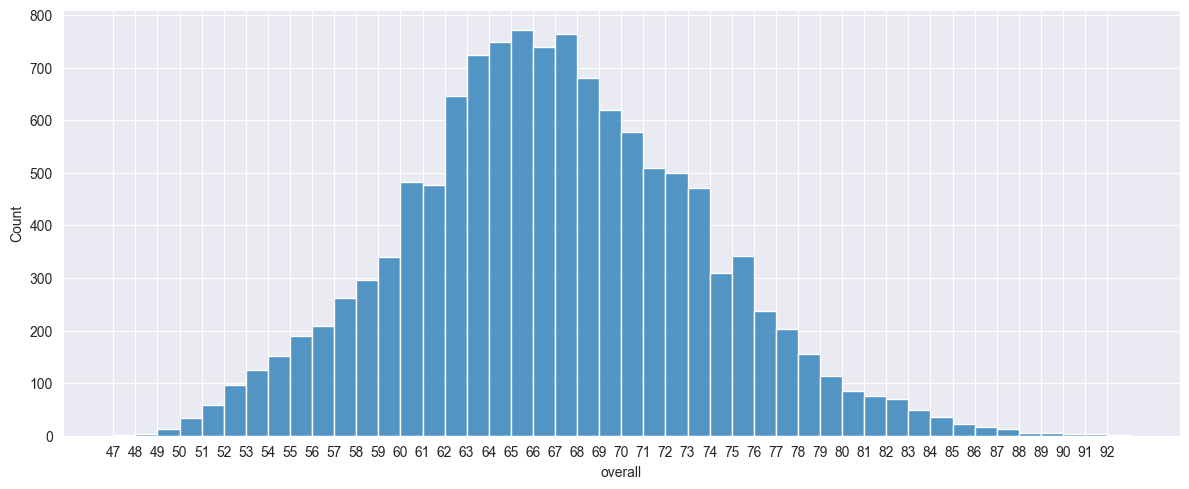

In [7]:
import numpy as np  # Biblioteca para funciones matemáticas
import matplotlib.pyplot as plt  # Biblioteca para visualizaciones
import seaborn as sns  # Facilita la creación de gráficos

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

# Graficar histograma de la columna 'overall' con ancho de bin de 1
sns.histplot(df, x='overall', binwidth=1)

# Ajustar marcas del eje x con valores enteros
bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)

# Mostrar el gráfico
plt.show()


# Jugadores del Equipo Ideal de la Copa Mundial

In [8]:
df.drop_duplicates('player_positions')
# viz -> https://trinket.io/python/0813ea96f6

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


# Los Jugadores más Talentosos de Cada Equipo Nacional

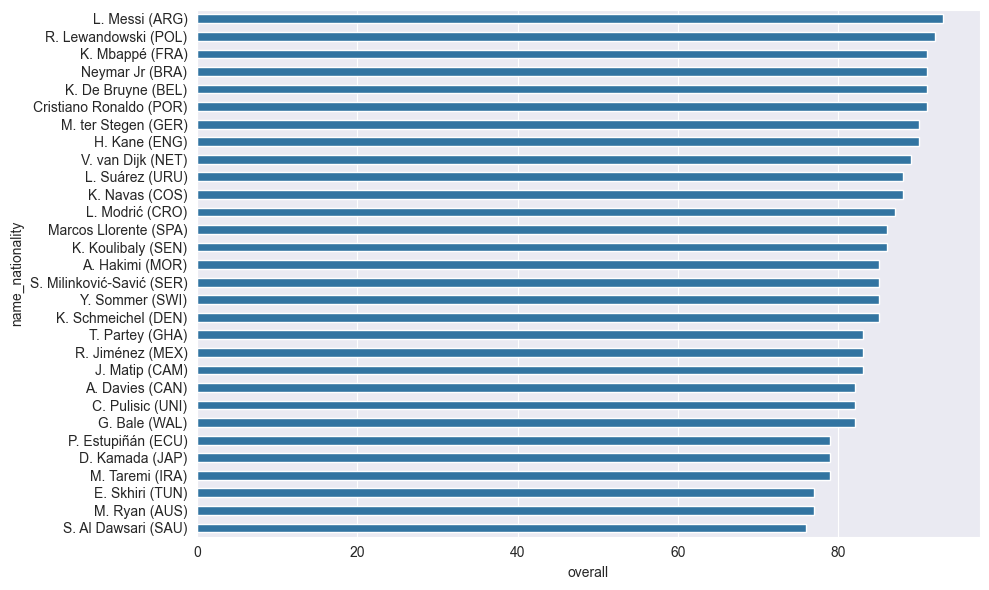

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar el DataFrame original
df_best_players = df.copy()

# Eliminar duplicados por país
df_best_players = df_best_players.drop_duplicates('nationality_name').reset_index(drop=True)

# Extraer las primeras 3 letras del país y convertirlas en mayúsculas
country_short = df_best_players['nationality_name'].str.extract(r'(^\w{3})', expand=False).str.upper()

# Crear una columna con el nombre del jugador y las iniciales del país
df_best_players['name_nationality'] = df_best_players['short_name'] + ' (' + country_short + ')'

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

# Graficar las habilidades de los mejores jugadores por país
sns.barplot(df_best_players, x='overall', y='name_nationality', width=0.5, legend=False)

# Mostrar el gráfico
plt.show()

# Mejor Equipo por Selección

In [13]:
# Definir la función para obtener los mejores jugadores por equipo nacional
def best_squad(nationality):
    # Crear una copia del DataFrame original para trabajar con él
    df_best_squad = df.copy()
    
    # Agrupar por nacionalidad y posiciones de jugadores, seleccionando los 2 mejores por cada posición
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    
    # Filtrar para seleccionar solo los jugadores del equipo nacional especificado
    df_best_squad = df_best_squad[df_best_squad['nationality_name'] == nationality]
    
    # Ordenar a los jugadores por posición, habilidad general ('overall') y potencial
    df_best_squad = df_best_squad.sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    
    # Retornar el DataFrame con los mejores jugadores del equipo
    return df_best_squad


In [17]:
best_squad('Argentina')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
93,L. Martínez,23,Argentina,85,89,Inter,78000000.0,145000.0,ST
177,Á. Correa,26,Argentina,83,86,Atlético de Madrid,48000000.0,80000.0,ST
2913,N. Molina,23,Argentina,73,81,Udinese Calcio,6500000.0,11000.0,RWB
5437,E. Meza,22,Argentina,70,76,Club Atlético Colón,2400000.0,6000.0,RWB
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
33,Á. Di María,33,Argentina,87,87,Paris Saint-Germain,49500000.0,160000.0,RW
412,E. Salvio,30,Argentina,80,80,Boca Juniors,20500000.0,23000.0,RM
617,E. Buendía,24,Argentina,79,84,Aston Villa,26500000.0,61000.0,RM
818,G. Montiel,24,Argentina,78,84,Sevilla FC,21000000.0,23000.0,RB
1083,F. Bustos,25,Argentina,77,80,Club Atlético Independiente,13000000.0,14000.0,RB


In [18]:
# Calcular el promedio de la habilidad general para cada equipo de la Copa del Mundo
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

# Crear un DataFrame con los equipos y su promedio de habilidad
df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})

# Eliminar filas con valores NaN (por si algún equipo no tiene datos suficientes)
df_average_overall = df_average_overall.dropna()

# Ordenar los equipos de mayor a menor según el promedio de habilidad general
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)

# Mostrar el DataFrame resultante
df_average_overall

,Teams,AVG_Overall
6,Spain,82.400000
7,Portugal,81.733333
5,England,81.700000
1,Brazil,81.666667
3,France,81.000000
4,Argentina,80.566667
11,Germany,80.433333
2,Belgium,79.034483
9,Netherlands,78.758621
8,Mexico,77.727273


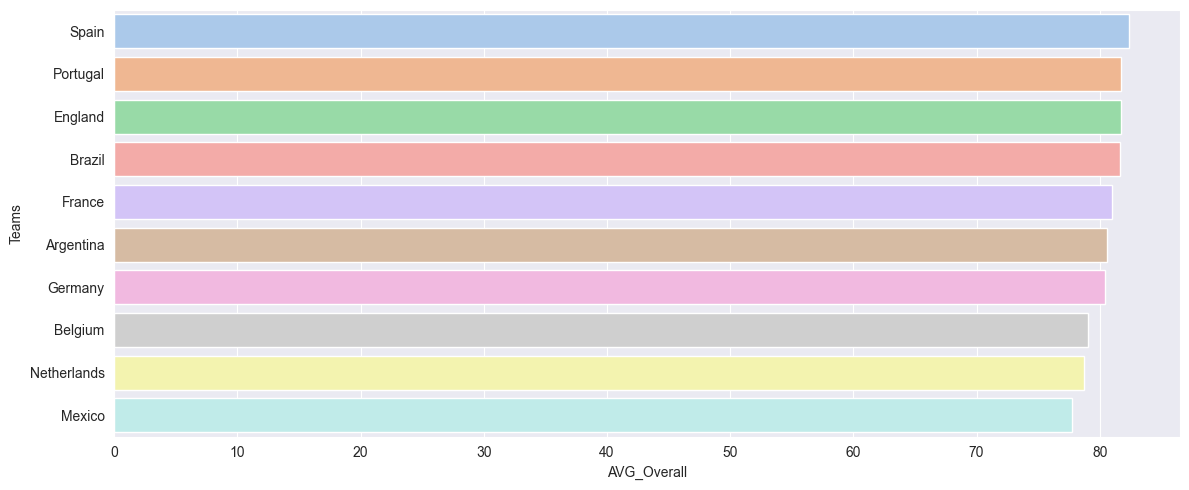

In [20]:
# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

# Crear un gráfico de barras para los 10 equipos con mayor promedio de habilidad
sns.barplot(data=df_average_overall[:10], x='AVG_Overall', y='Teams',
            hue='Teams', palette=sns.color_palette('pastel'), legend=False)

# Mostrar el gráfico
plt.show()

# Mejor Formación para Cada Equipo

In [21]:
def best_lineup(nationality, lineup):
    # Contar cuántas veces aparece cada posición en la alineación
    lineup_count = [lineup.count(i) for i in lineup]

    # Crear un DataFrame con las posiciones y su respectivo conteo
    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})

    # Obtener posiciones que aparecen solo una vez y las que se repiten
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    # Obtener el mejor escuadrón para la nacionalidad dada
    df_squad = best_squad(nationality)

    # Crear una alineación combinando jugadores no repetidos y los mejores de las posiciones repetidas
    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]
    ])
    
    # Retornar un DataFrame con los nombres, habilidad general, club y posiciones de los jugadores seleccionados
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]


In [24]:
# Diccionario que mapea las formaciones de fútbol a las posiciones de los jugadores
dict_formation = {
    # Formación 4-3-3: 1 portero, 4 defensores, 3 mediocampistas y 3 delanteros
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    
    # Formación 4-4-2: 1 portero, 4 defensores, 4 mediocampistas y 2 delanteros
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    
    # Formación 4-2-3-1: 1 portero, 4 defensores, 2 mediocampistas defensivos, 3 mediocampistas ofensivos y 1 delantero
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}


In [25]:
# Iterar sobre las primeras 9 filas del DataFrame df_average_overall
for index, row in df_average_overall[:9].iterrows():
    max_average = None  # Inicializa la variable para almacenar la mejor media
    formation = None  # Inicializa la variable para almacenar la mejor formación
    # Iterar sobre las formaciones en dict_formation
    for key, values in dict_formation.items():
        # Calcular el promedio de la calificación de los jugadores en la formación actual
        average = best_lineup(row['Teams'], values)['overall'].mean()
        
        # Verificar si la media actual es mayor que la mejor media encontrada
        if max_average is None or average > max_average:
            max_average = average  # Actualiza la mejor media
            formation = key  # Guarda la formación correspondiente

    # Imprimir el equipo, la mejor formación y su promedio
    print(row['Teams'], formation, max_average)

Spain 4-2-3-1 85.1
Portugal 4-2-3-1 84.9
England 4-4-2 84.45454545454545
Brazil 4-3-3 84.81818181818181
France 4-2-3-1 83.9
Argentina 4-3-3 83.54545454545455
Germany 4-2-3-1 84.1
Belgium 4-3-3 82.54545454545455
Netherlands 4-4-2 82.54545454545455


In [26]:
#Llamar a la función best_lineup para obtener la mejor alineación de Argentina con la formación 4-3-3
best_lineup('Argentina', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
93,L. Martínez,85,Inter,ST
0,L. Messi,93,Paris Saint-Germain,RW
818,G. Montiel,78,Sevilla FC,RB
171,L. Ocampos,83,Sevilla FC,LW
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
247,R. De Paul,82,Atlético de Madrid,CM
206,É. Banega,82,Al Shabab,CDM
69,A. Gómez,85,Sevilla FC,CAM
269,C. Romero,82,Tottenham Hotspur,CB
